# Many to one relationship

### articles app에서 user 모델 참조

*(appname)/models.py

from django.conf import settings

Article class 정의 시 user fields 정의 --> 외래키

user = models.ForeignKey(settings.AUTH_USER_MODEL, on_delete=models.CASCADE)

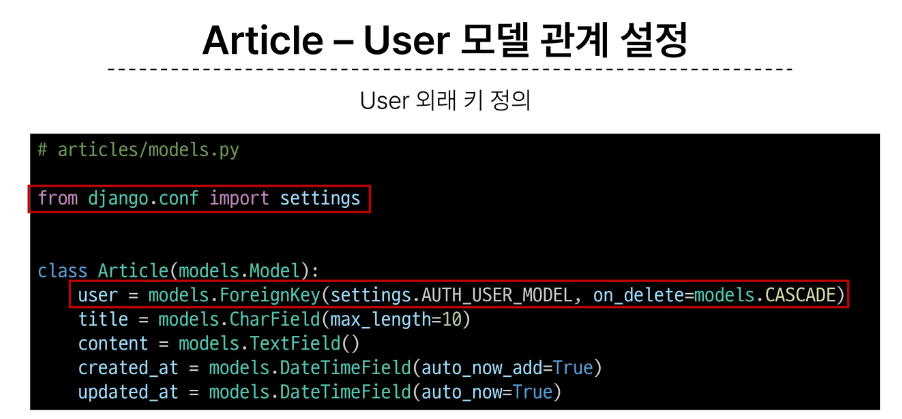

```
on_delete 옵션은 django에서 model을 구현할 때 데이터베이스 상에서 참조무결성을 유지하여 ForeginKeyField가 바라보는 값이 삭제될 때 해당 요소를 처리하는 방법을 지정해 줌

* 옵션

1. CASCADE : ForeignKeyField를 포함하는 model instance(row)도 같이 삭제함

2. PROTECT : 해당 요소가 같이 삭제되지 않도록 ProtectedError를 발생시킴

3. SET_NULL : ForeignKeyField 값을 NULL로 바꾼다. null=True일 때만 사용 가능.

4. SET_DEFAULT : ForeignKeyField 값을 default 값으로 변경한다. default 값이 있을 때만 사용 가능. 

5. SET() : ForeignKeyField 값을 SET에 설정된 함수 등에 의해 설정함.

6. DO_NOTHING : 아무런 행동을 취하지 않음. 참조 무결성을 해칠 위험이 있어 잘 사용 X


ref) https://vallhalla-edition.tistory.com/60

```

### User model을 참조하는 2가지 방법

django 프로젝트의 "내부 구동 순서"와 "반환 값"에 따른 이유

1. get_user_model()

    반환값 : User Object(object)
    사용 위치 : models.py가 아닌 다른 모든 위치

2. settings.AUTH_USER_MODEL

    반환값 : accounts.User(string)
    사용 위치 : models.py

--> User model 직접 참조 X

### 외래키 참조 데이터 제어하기

foreing key field를 사용자가 직접 선택하는 문제 발생

```
articles/form.py
class ArticleForm(froms.ModelForm):
    class Meta:
        model = Article
        fields = ("title", "content",) # 1. 사용자 작성 필드 직접 지정
        # exclude = ("user",) # 2. 제외할 필드 지정
```

--> 사용자가 보는 create page에 user 보이지 않음
대신 view 함수에서 직접 필드를 채워주어야 한다

```
articels/views.py

@login_required
def create(request):
    if request.method == "POST":
    form = ArticleForm(request.POST)
    if form.is_valid():
        article = form.save(commit=False)
        article.user = request.user
        article.save()
        return redirect("articles:detail", article.pk)
    ...
```

### comment-user model relationship

```
articles/models.py

class Comment(models.Model):
    article = models.ForeignKey(Article, on_delete=models.CASCADE)
    user = models.ForeignKey(settings.AUTH_USER_MODEL, on_delete=models.CASCADE)
    created_at = ...
```

conf : configuration 구성
contrib : 뭘 기여한다는거지
ref ) https://docs.djangoproject.com/en/4.2/ref/contrib/
https://runebook.dev/ko/docs/django/ref/contrib/index
